# **Install modules**

In [ ]:
!pip install catboost

# **Add modules**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import *
from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from sklearn.model_selection import train_test_split

# **Load data**

In [3]:
# Specify the correct path to the train.csv file
train_path = './data/train.csv'
train_data = pd.read_csv(train_path)

# Specify the correct path to the item-features.csv file
item_features_path = './data/item-features.csv'
item_features_data = pd.read_csv(item_features_path)

# Specify the correct path to the user-features.csv file
user_features_path = './data/user-features.csv'
user_features_data = pd.read_csv(user_features_path)

# Specify the correct path to the test.csv file
test_path = './data/test.csv'
test_data = pd.read_csv(test_path)

# **Analyse data**

In [4]:
train_data.head()

,user_id,item_id,like,timestamp
0,140,342,0,1490936622
1,378,172,1,1490936628
2,150,182,0,1490936650
3,455,17,0,1490936704
4,350,409,0,1490936735


In [5]:
train_data.describe()

,user_id,item_id,like,timestamp
count,8674.000000,8674.000000,8674.000000,8.674000e+03
mean,244.855891,179.805626,0.175928,1.491073e+09
std,143.102186,126.366142,0.380781,7.970218e+04
min,0.000000,0.000000,0.000000,1.490937e+09
25%,121.000000,73.000000,0.000000,1.491004e+09
50%,243.000000,154.000000,0.000000,1.491071e+09
75%,368.000000,266.000000,0.000000,1.491141e+09
max,496.000000,443.000000,1.000000,1.491216e+09


In [6]:
user_features_data.head()

,user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0.000695,-0.001573,-0.001470,0.002085,-0.000498,0.000685,0.000811,0.000666,-0.003031,-0.003031,0.003419,0.000290,0.002290,0.001305,0.000772,-0.002100,-0.000179,-0.001676,-0.000888,-0.000888,-0.000743,-0.003181,-0.004196,-0.000698,0.001121,-0.001079,-0.001993,-0.001993,0.000422,-0.001168,-0.001168,0.000297
1,1,0.001204,-0.002725,-0.002546,0.003612,-0.000862,0.001187,0.001404,0.001154,-0.005251,-0.005251,0.005921,0.000502,0.003966,0.002260,0.001337,-0.003637,-0.000310,-0.002904,-0.001539,-0.001539,-0.001286,-0.005510,-0.007268,-0.001209,0.001942,-0.001870,-0.003451,-0.003451,0.000732,-0.002023,-0.002023,0.000515
2,2,0.000491,-0.001112,-0.001039,0.001475,-0.000352,0.000484,0.000573,0.000471,-0.002144,-0.002144,0.002417,0.000205,0.001619,0.000923,0.000546,-0.001485,-0.000126,-0.001185,-0.000628,-0.000628,-0.000525,-0.002250,-0.002967,-0.000494,0.000793,-0.000763,-0.001409,-0.001409,0.000299,-0.000826,-0.000826,0.000210
3,3,0.000777,-0.001759,-0.001643,0.002332,-0.000557,0.000766,0.000906,0.000745,-0.003389,-0.003389,0.003822,0.000324,0.002560,0.001459,0.000863,-0.002348,-0.000200,-0.001874,-0.000993,-0.000993,-0.000830,-0.003557,-0.004691,-0.000781,0.001254,-0.001207,-0.002228,-0.002228,0.000472,-0.001306,-0.001306,0.000332
4,4,0.000695,-0.001573,-0.001470,0.002085,-0.000498,0.000685,0.000811,0.000666,-0.003031,-0.003031,0.003419,0.000290,0.002290,0.001305,0.000772,-0.002100,-0.000179,-0.001676,-0.000888,-0.000888,-0.000743,-0.003181,-0.004196,-0.000698,0.001121,-0.001079,-0.001993,-0.001993,0.000422,-0.001168,-0.001168,0.000297


In [7]:
user_features_data.describe()

,user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,248.000000,0.001739,-0.003936,-0.003678,0.005218,-0.001246,0.001714,0.002029,0.001667,-0.007585,-0.007585,0.008554,0.000726,0.005730,0.003265,0.001931,-0.005254,-0.000448,-0.004195,-0.002223,-0.002223,-0.001858,-0.007961,-0.010500,-0.001747,0.002806,-0.002701,-0.004986,-0.004986,0.001057,-0.002923,-0.002923,0.000744
std,143.615807,0.001148,0.002598,0.002428,0.003445,0.000822,0.001132,0.001339,0.001100,0.005007,0.005007,0.005647,0.000479,0.003783,0.002155,0.001275,0.003468,0.000295,0.002769,0.001468,0.001468,0.001227,0.005255,0.006931,0.001153,0.001852,0.001783,0.003292,0.003292,0.000698,0.001930,0.001930,0.000491
min,0.000000,0.000491,-0.016461,-0.015381,0.001475,-0.005209,0.000484,0.000573,0.000471,-0.031721,-0.031721,0.002417,0.000205,0.001619,0.000923,0.000546,-0.021972,-0.001872,-0.017543,-0.009296,-0.009296,-0.007772,-0.033291,-0.043910,-0.007307,0.000793,-0.011296,-0.020852,-0.020852,0.000299,-0.012224,-0.012224,0.000210
25%,124.000000,0.000919,-0.005036,-0.004706,0.002759,-0.001594,0.000906,0.001073,0.000881,-0.009705,-0.009705,0.004522,0.000384,0.003029,0.001726,0.001021,-0.006722,-0.000573,-0.005367,-0.002844,-0.002844,-0.002378,-0.010185,-0.013434,-0.002236,0.001484,-0.003456,-0.006380,-0.006380,0.000559,-0.003740,-0.003740,0.000393
50%,248.000000,0.001390,-0.003146,-0.002940,0.004171,-0.000996,0.001370,0.001622,0.001332,-0.006063,-0.006063,0.006837,0.000580,0.004580,0.002610,0.001544,-0.004199,-0.000358,-0.003353,-0.001777,-0.001777,-0.001485,-0.006363,-0.008392,-0.001397,0.002243,-0.002159,-0.003985,-0.003985,0.000845,-0.002336,-0.002336,0.000595
75%,372.000000,0.002225,-0.002081,-0.001944,0.006676,-0.000658,0.002193,0.002596,0.002132,-0.004010,-0.004010,0.010945,0.000928,0.007331,0.004178,0.002471,-0.002778,-0.000237,-0.002218,-0.001175,-0.001175,-0.000982,-0.004209,-0.005551,-0.000924,0.003590,-0.001428,-0.002636,-0.002636,0.001353,-0.001545,-0.001545,0.000952
max,496.000000,0.007273,-0.001112,-0.001039,0.021822,-0.000352,0.007169,0.008484,0.006969,-0.002144,-0.002144,0.035773,0.003034,0.023962,0.013654,0.008077,-0.001485,-0.000126,-0.001185,-0.000628,-0.000628,-0.000525,-0.002250,-0.002967,-0.000494,0.011735,-0.000763,-0.001409,-0.001409,0.004421,-0.000826,-0.000826,0.003111


In [8]:
item_features_data.head()

,item_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,35,0.005646,-0.012780,-0.011941,0.016942,-0.004044,0.005566,0.006587,0.005411,-0.024627,-0.024627,0.027773,0.002356,0.018603,0.010601,0.006271,-0.017058,-0.001453,-0.013620,-0.007217,-0.007217,-0.006034,-0.025846,-0.034090,-0.005673,0.009111,-0.008770,-0.016189,-0.016189,0.003432,-0.009490,-0.009490,0.002416
1,19,0.002530,-0.005726,-0.005350,0.007591,-0.001812,0.002494,0.002951,0.002424,-0.011035,-0.011035,0.012444,0.001056,0.008335,0.004750,0.002810,-0.007643,-0.000651,-0.006103,-0.003234,-0.003234,-0.002703,-0.011580,-0.015274,-0.002542,0.004082,-0.003929,-0.007254,-0.007254,0.001538,-0.004252,-0.004252,0.001082
2,145,0.001592,-0.003604,-0.003368,0.004778,-0.001141,0.001570,0.001858,0.001526,-0.006946,-0.006946,0.007833,0.000664,0.005247,0.002990,0.001769,-0.004811,-0.000410,-0.003841,-0.002036,-0.002036,-0.001702,-0.007289,-0.009615,-0.001600,0.002570,-0.002473,-0.004566,-0.004566,0.000968,-0.002677,-0.002677,0.000681
3,36,0.002866,-0.006486,-0.006060,0.008598,-0.002052,0.002825,0.003343,0.002746,-0.012499,-0.012499,0.014095,0.001196,0.009442,0.005380,0.003183,-0.008657,-0.000738,-0.006912,-0.003663,-0.003663,-0.003062,-0.013117,-0.017301,-0.002879,0.004624,-0.004451,-0.008216,-0.008216,0.001742,-0.004816,-0.004816,0.001226
4,357,0.000602,-0.001362,-0.001273,0.001806,-0.000431,0.000593,0.000702,0.000577,-0.002625,-0.002625,0.002961,0.000251,0.001983,0.001130,0.000668,-0.001818,-0.000155,-0.001452,-0.000769,-0.000769,-0.000643,-0.002755,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258


In [9]:
item_features_data.describe()

,item_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,221.500000,0.000439,-0.003094,-0.000707,0.002174,0.001087,0.000673,0.000247,0.000774,-0.004414,-0.004414,0.005342,0.000718,0.003613,0.002671,-0.000396,-0.002783,-0.000106,-0.003603,-0.001560,-0.001560,-0.001430,-0.004774,-0.007104,-0.001180,0.001865,-0.001499,-0.003270,-0.003270,0.000345,-0.002038,-0.002038,-0.000046
std,128.316016,0.016297,0.021682,0.022706,0.015934,0.032901,0.024576,0.026334,0.028865,0.007102,0.007102,0.010998,0.012981,0.020061,0.013075,0.028521,0.021455,0.016768,0.016130,0.009886,0.009886,0.009462,0.018966,0.016812,0.012480,0.031342,0.017446,0.008021,0.008021,0.011123,0.011271,0.011271,0.023676
min,0.000000,-0.142731,-0.299908,-0.060060,-0.246777,-0.081493,-0.389399,-0.326175,-0.492083,-0.107230,-0.107230,-0.102784,-0.117691,-0.149481,-0.115648,-0.588357,-0.223907,-0.190304,-0.275593,-0.125772,-0.125772,-0.065734,-0.187870,-0.284258,-0.176811,-0.286772,-0.172129,-0.083170,-0.083170,-0.112601,-0.110081,-0.110081,-0.370836
25%,110.750000,0.000491,-0.002836,-0.002650,0.001475,-0.000897,0.000484,0.000573,0.000471,-0.005465,-0.005465,0.002417,0.000205,0.001619,0.000923,0.000546,-0.003785,-0.000322,-0.003022,-0.001602,-0.001602,-0.001339,-0.005735,-0.007565,-0.001259,0.000793,-0.001946,-0.003626,-0.003626,0.000299,-0.002106,-0.002106,0.000210
50%,221.500000,0.000851,-0.001927,-0.001800,0.002554,-0.000610,0.000839,0.000993,0.000816,-0.003713,-0.003713,0.004187,0.000355,0.002805,0.001598,0.000945,-0.002572,-0.000219,-0.002053,-0.001088,-0.001088,-0.000910,-0.003896,-0.005139,-0.000855,0.001373,-0.001322,-0.002441,-0.002441,0.000495,-0.001431,-0.001431,0.000364
75%,332.250000,0.001253,-0.001112,-0.001039,0.003759,-0.000352,0.001235,0.001462,0.001201,-0.002144,-0.002144,0.006163,0.000523,0.004128,0.002441,0.001392,-0.001485,-0.000126,-0.001185,-0.000628,-0.000628,-0.000525,-0.002250,-0.002967,-0.000494,0.002022,-0.000763,-0.001409,-0.001409,0.000762,-0.000826,-0.000826,0.000536
max,443.000000,0.144249,0.181685,0.315345,0.087781,0.640721,0.236851,0.333698,0.287157,0.043447,0.043447,0.153114,0.188183,0.323409,0.145262,0.040691,0.337763,0.209805,0.057032,0.079528,0.079528,0.126044,0.282015,0.106962,0.113402,0.564544,0.223320,0.096677,0.096677,0.166880,0.159891,0.159891,0.214498


In [10]:
test_data.head()

,user_id,timestamp
0,166,1490944431
1,26,1490957371
2,41,1490958147
3,286,1490971255
4,108,1490976836


In [11]:
test_data.describe()

,user_id,timestamp
count,497.000000,4.970000e+02
mean,248.000000,1.491146e+09
std,143.615807,5.838927e+04
min,0.000000,1.490944e+09
25%,124.000000,1.491117e+09
50%,248.000000,1.491161e+09
75%,372.000000,1.491193e+09
max,496.000000,1.491215e+09


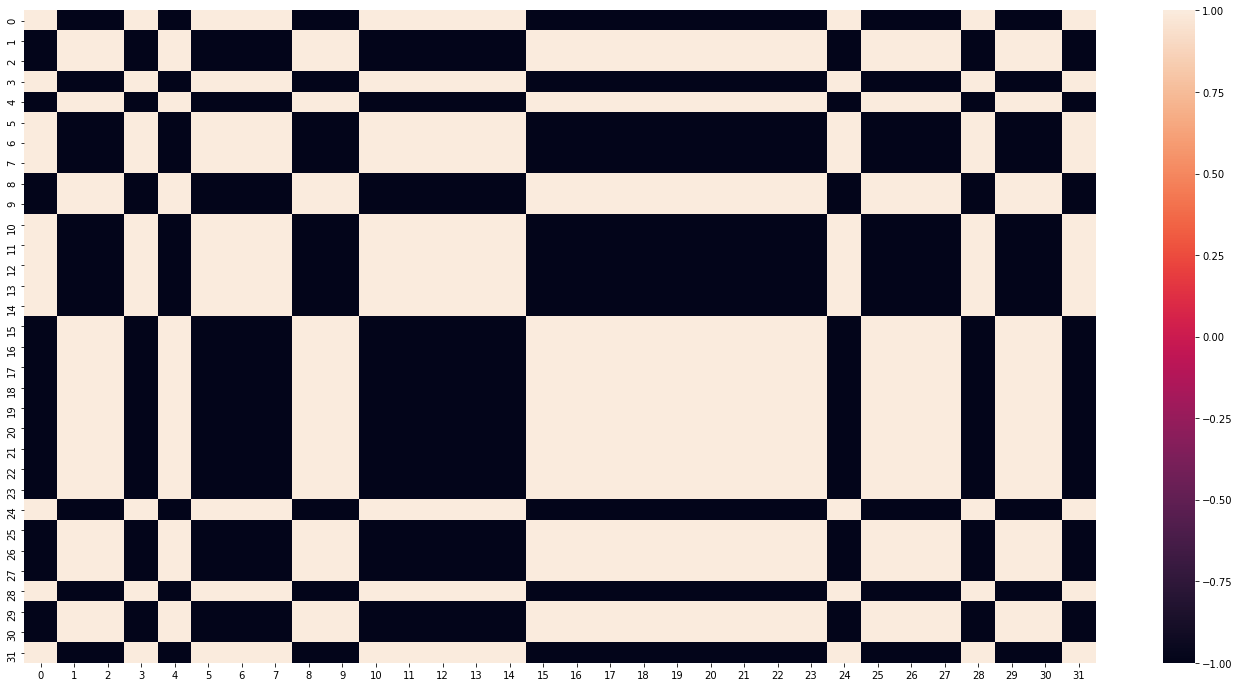

In [12]:
plt.figure(figsize=(24, 12))
corr = user_features_data.drop(['user_id'], axis=1).corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

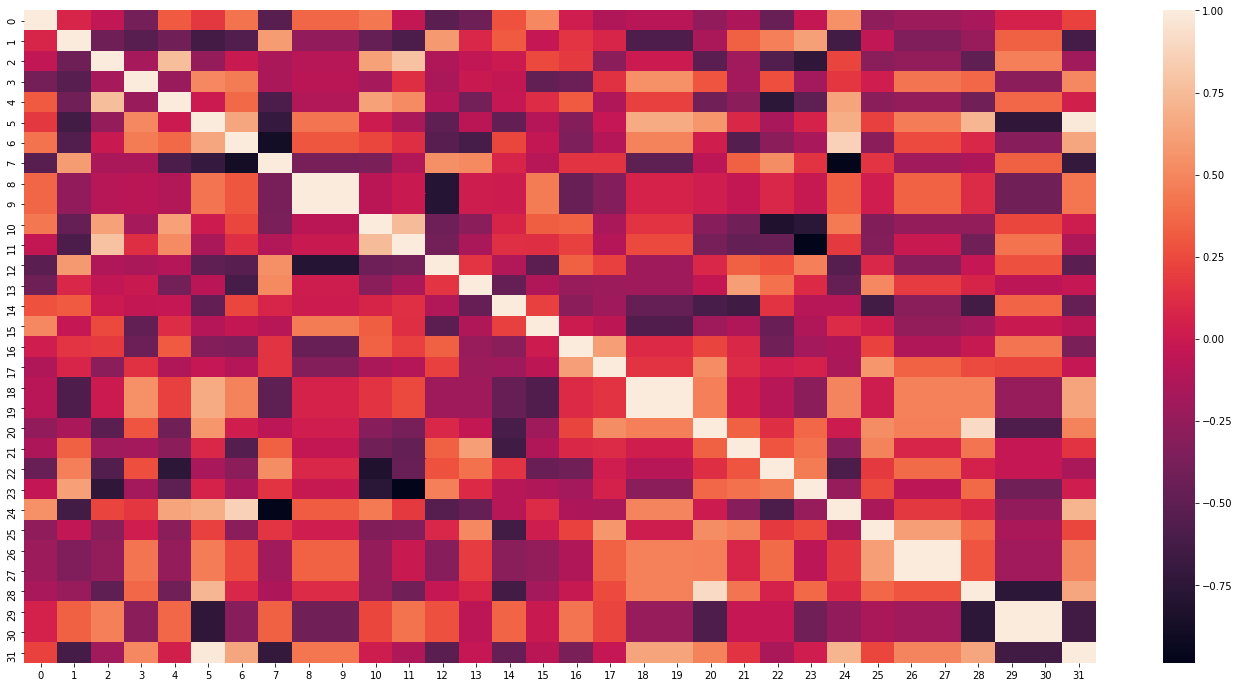

In [13]:
plt.figure(figsize=(24, 12))
corr = item_features_data.drop(['item_id'], axis=1).corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

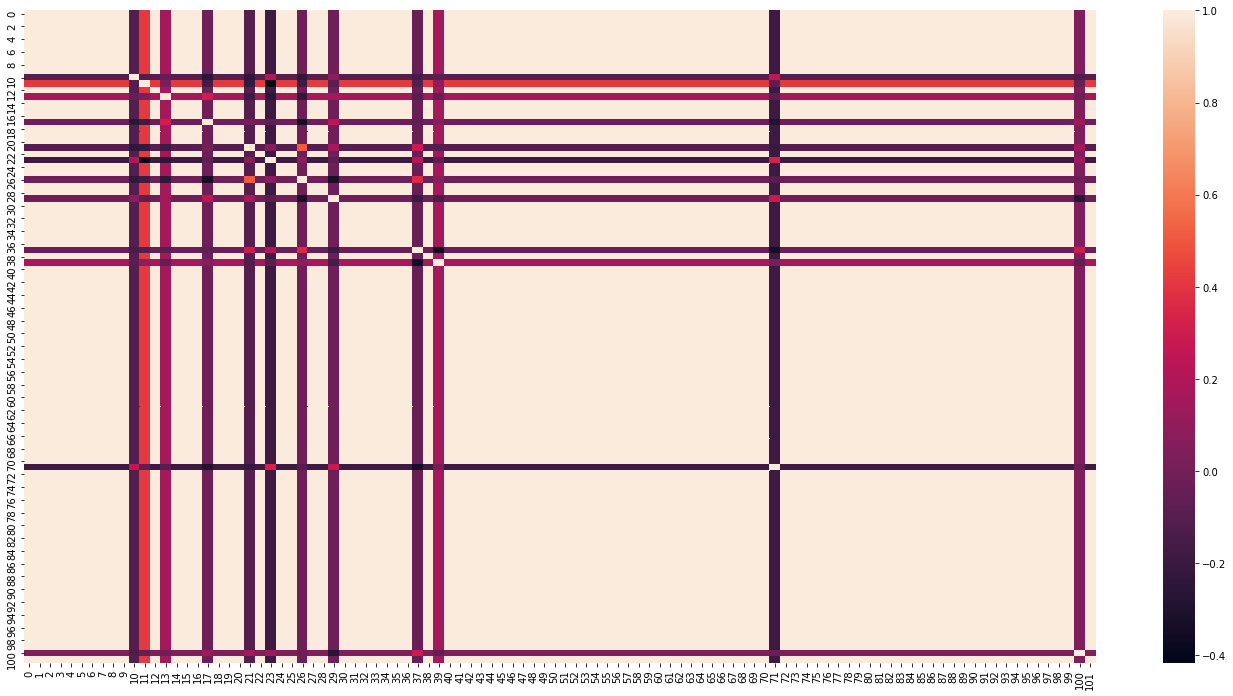

In [14]:
plt.figure(figsize=(24, 12))
items = item_features_data.drop('item_id', axis=1)[:102]
similarity_df = pd.DataFrame(cosine_similarity(items, items))
sns.heatmap(similarity_df)

*   **train_data:**
> 1. We can use the average rating of each banner as a feature.
> 2. We can use the total number of interactions with each banner as a feature.

*   **user_features_data**:
> 1. Checked for **user features similarity**. The results are as follows: **all features are linearly dependent** of each other. **Colclusion**: we can leave any single feature (or none at all if it turns out that all user features are meaningless).
> 2. Checked for **users similarity**. The results are as follows: almost **all users are unique**.

*   **item_features_data**:
> 1. Checked for **item features similarity**. The results are as follows: **9, 19, 27, and 30 features are copies** of features 8, 18, 26, and 29 correspondingly, and all the others are linearly independent of each other. **Conclusion**: features 9, 19, 27, 30 can be excluded.
> 2. Checked for **items similarity**. The results are as follows: **all items except for 10, 11, 13, 17, 21, 23, 26, 29, 37, 39, 71, and 100 are similar and only differ in vector length in the features space**. **Conclusion**: we can try and replace all the item features with just two features: the label of unique item group and the vector length in the features space.

# **Preprocess data**

In [15]:
# train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='s')
# min train timestamp: 2017-03-31 05:03:42
# max train timestamp: 2017-04-03 10:33:15
train_data = train_data.drop('timestamp', axis=1)

In [16]:
# test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], unit='s')
test_data = test_data.drop('timestamp', axis=1)

In [17]:
user_features_data = user_features_data[['user_id', '0']]
user_features_data.rename(columns={'0': 'user_f'}, inplace=True)

In [18]:
item_features_data = item_features_data.drop(['9', '19', '27', '30'], axis=1)

# **Create train_df**

In [19]:
# Unique items: 10, 11, 13, 17, 21, 23, 26, 29, 37, 39, 71, 100, and all others
item_features_data.loc[:, 'label'] = 0
item_features_data.loc[item_features_data['item_id'] == 10, 'label'] = 1
item_features_data.loc[item_features_data['item_id'] == 11, 'label'] = 2
item_features_data.loc[item_features_data['item_id'] == 13, 'label'] = 3
item_features_data.loc[item_features_data['item_id'] == 17, 'label'] = 4
item_features_data.loc[item_features_data['item_id'] == 21, 'label'] = 5
item_features_data.loc[item_features_data['item_id'] == 23, 'label'] = 6
item_features_data.loc[item_features_data['item_id'] == 26, 'label'] = 7
item_features_data.loc[item_features_data['item_id'] == 29, 'label'] = 8
item_features_data.loc[item_features_data['item_id'] == 37, 'label'] = 9
item_features_data.loc[item_features_data['item_id'] == 39, 'label'] = 10
item_features_data.loc[item_features_data['item_id'] == 71, 'label'] = 11
item_features_data.loc[item_features_data['item_id'] == 100, 'label'] = 12

In [20]:
# Create new feature: size (length of feature vector in feature space)
tmp = pd.DataFrame(0, index=np.arange(item_features_data.shape[0]), columns=item_features_data.drop(['item_id', 'label'], axis=1).columns)
item_features_data['size'] = paired_distances(item_features_data.drop(['item_id', 'label'], axis=1), tmp)

In [21]:
# Merge train_data, user_features_data, and item_features_data
interactions_items = pd.merge(train_data, item_features_data, on='item_id')
interactions_items_users = pd.merge(interactions_items, user_features_data, on='user_id')

In [22]:
# Create new features: avg_rating and total_likes
ratings_mean_count = pd.DataFrame(interactions_items_users.groupby('item_id')['like'].mean())
ratings_mean_count.rename(columns={'like': 'avg_rating'}, inplace=True)
ratings_mean_count['total_likes'] = pd.DataFrame(interactions_items_users.groupby('item_id')['like'].count())
#ratings_mean_count.head()

In [23]:
# Merge interactions_items_users and ratings_mean_count (new features)
train_df = pd.merge(interactions_items_users, ratings_mean_count, on='item_id')
train_df.rename(columns={'like': 'known_like'}, inplace=True)

In [24]:
train_df.head()

,user_id,item_id,known_like,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,28,29,31,label,size,user_f,avg_rating,total_likes
0,140,342,0,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,0.001709,0.000145,0.001145,0.000652,0.000386,-0.00105,-0.000089,-0.000838,-0.000444,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149,0,0.004599,0.001300,0.0,6
1,32,342,0,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,0.001709,0.000145,0.001145,0.000652,0.000386,-0.00105,-0.000089,-0.000838,-0.000444,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149,0,0.004599,0.000602,0.0,6
2,34,342,0,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,0.001709,0.000145,0.001145,0.000652,0.000386,-0.00105,-0.000089,-0.000838,-0.000444,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149,0,0.004599,0.000491,0.0,6
3,350,342,0,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,0.001709,0.000145,0.001145,0.000652,0.000386,-0.00105,-0.000089,-0.000838,-0.000444,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149,0,0.004599,0.000919,0.0,6
4,146,342,0,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,0.001709,0.000145,0.001145,0.000652,0.000386,-0.00105,-0.000089,-0.000838,-0.000444,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149,0,0.004599,0.000777,0.0,6


In [25]:
# Rearrange columns in train_df
cols =  ['user_id', 'user_f', 'item_id', 'avg_rating',
         'total_likes', 'size', 'label', 'known_like']

In [26]:
train_df = train_df[cols]
train_df.head()

,user_id,user_f,item_id,avg_rating,total_likes,size,label,known_like
0,140,0.001300,342,0.0,6,0.004599,0,0
1,32,0.000602,342,0.0,6,0.004599,0,0
2,34,0.000491,342,0.0,6,0.004599,0,0
3,350,0.000919,342,0.0,6,0.004599,0,0
4,146,0.000777,342,0.0,6,0.004599,0,0


In [27]:
# Can't have ids in final dataframe, so drop them
train_df = train_df.drop(['user_id', 'item_id'], axis=1)
# Can't trust high ratings with low ratings count
train_df.loc[train_df['total_likes'] < 10, 'avg_rating'] = None
train_df.head()

,user_f,avg_rating,total_likes,size,label,known_like
0,0.001300,NaN,6,0.004599,0,0
1,0.000602,NaN,6,0.004599,0,0
2,0.000491,NaN,6,0.004599,0,0
3,0.000919,NaN,6,0.004599,0,0
4,0.000777,NaN,6,0.004599,0,0


# **Create test_df**

In [28]:
# Follow the same logic as for train_df
test_df = pd.DataFrame(index=np.arange(item_features_data.shape[0]), columns=['user_f'])
tmp = pd.merge(item_features_data, ratings_mean_count, on='item_id').sort_values('item_id')
test_df = pd.concat([test_df, tmp], axis=1)

In [29]:
# Rearrange columns in test_df
cols =  ['user_f', 'item_id', 'avg_rating', 'total_likes', 'size', 'label']

In [30]:
test_df = test_df[cols]

In [31]:
test_df.set_index('item_id', inplace=True)
test_df.index.name = None
test_df = test_df.sort_index()
test_df.loc[test_df['total_likes'] < 10, 'avg_rating'] = None
test_df.head()

,user_f,avg_rating,total_likes,size,label
0,NaN,0.142857,14,0.018964,0
1,NaN,NaN,6,0.032847,0
2,NaN,0.500000,18,0.024769,0
3,NaN,NaN,7,0.018398,0
4,NaN,0.250000,28,0.022997,0


In [32]:
test_df_lst = []
for user_id in user_features_data['user_id'].values:
    tmp = test_df.copy()
    tmp.loc[:, 'user_f'] = user_features_data.loc[user_features_data['user_id'] == user_id]['user_f'].values[0]
    test_df_lst.append(tmp)
test_df_lst[0].head()

,user_f,avg_rating,total_likes,size,label
0,0.000695,0.142857,14,0.018964,0
1,0.000695,NaN,6,0.032847,0
2,0.000695,0.500000,18,0.024769,0
3,0.000695,NaN,7,0.018398,0
4,0.000695,0.250000,28,0.022997,0


# **Build Catboost model**

In [33]:
X = np.array(train_df.drop('known_like', axis=1))
y = np.ravel(train_df['known_like'])

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [35]:
model = CatBoostClassifier(iterations=1500,
                           learning_rate=0.01,
                           l2_leaf_reg=9.0,
                           depth=10,
                           rsm=0.5,
                           loss_function='Logloss',
                           logging_level='Silent',
                           use_best_model=True,
                           random_state=123)
#cv_data = cv(Pool(X, y),
#             model.get_params(),
#             fold_count=5)
#print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Logloss-mean'])))
#cv_data

In [36]:
model.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid)
    )

# **Generate output**

In [37]:
output = pd.DataFrame(columns=(['user_id'] + [i for i in range(20)]))

for id in test_data['user_id'].values:
    k = 0
    res = []
    predictions = model.predict_proba(test_df_lst[user_id])[:, 1]
    preds_df = pd.DataFrame(predictions)
    preds_df = preds_df.sort_values(0, ascending=False)
    for rec in preds_df.index.values:
        if rec not in train_data.loc[train_data['user_id'] == id]['item_id'].values:
            res.append(rec)
            k += 1
            if k == 20:
                break
    output.loc[id] = [id] + list(res)

In [38]:
output.head()

,user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
166,166,76,37,35,22,60,65,66,80,11,21,58,7,5,36,40,72,146,87,78,33
26,26,76,37,35,22,60,65,66,80,11,21,58,7,5,36,40,72,146,87,78,67
41,41,76,37,35,22,60,65,66,80,11,21,58,5,36,40,72,146,87,78,67,33
286,286,76,37,35,22,60,65,66,80,11,21,58,7,5,36,72,146,87,78,67,33
108,108,76,37,35,22,60,66,80,11,21,58,7,5,36,40,72,146,87,78,67,33


In [39]:
#output.to_csv('./data/submission.csv', index=False)